In [1]:
import pandas as pd

DATASET_PATH = "dataset.json"

btc_price_history = pd.read_json(DATASET_PATH)

In [65]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

interval = "1w"

random_state = 42

hyperparameters = {
    "n_estimators": 128,
    "max_depth": 2,
    "learning_rate": 0.1,
}

close_timestamps = pd.to_datetime(btc_price_history[interval]["ct"], unit='ms')
close_prices = btc_price_history[interval]["c"]

X = close_timestamps.values.astype(int).reshape(-1, 1)
y = close_prices

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

gradient_boost = GradientBoostingRegressor(n_estimators=hyperparameters.get('n_estimators'),
    max_depth=hyperparameters.get('max_depth'),
    random_state=random_state, n_jobs=-1)

gradient_boost.fit(X_train, y_train)

y_pred = gradient_boost.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r_squared}")

Mean Squared Error: 6910414.813392196
Root Mean Squared Error (RMSE): 2628.766785660568
R-squared (R²): 0.9655039014742481


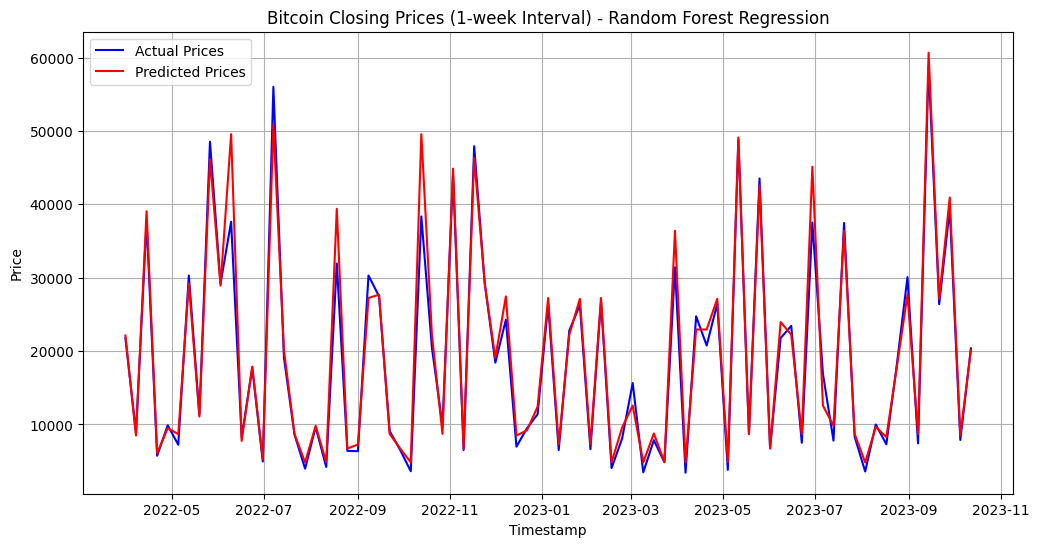

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(close_timestamps[-len(y_test):], y_test, color='blue', label='Actual Prices')
plt.plot(close_timestamps[-len(y_test):], y_pred, color='red', label='Predicted Prices')
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.title("Bitcoin Closing Prices (1-week Interval) - Random Forest Regression")
plt.legend()
plt.grid(True)
plt.show()

In [67]:
epoch = 1693526400
gradient_boost.predict([[epoch]])

array([4876.17058116])

In [89]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search over
param_grid = {
    'n_estimators': [8, 16, 32, 64, 128],
    'max_depth': [2, 4, 6, 8, 10, 12],
    'learning_rate': [0.1, 0.01, 0.001],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=random_state), param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_gradient_boost = grid_search.best_estimator_
best_gradient_boost.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = best_gradient_boost.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r_squared}")

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 128}
Mean Squared Error: 6910414.813392196
Root Mean Squared Error (RMSE): 2628.766785660568
R-squared (R²): 0.9655039014742481
